# Task
Analyse this file and develop a SMS classification ML model that identifies spam models

Here is all the data you need:
"spam.csv"

## Data loading

### Subtask:
Load the "spam.csv" file into a pandas DataFrame.


In [1]:
import pandas as pd

try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
    display(df.head())
    print(df.info())
except FileNotFoundError:
    print("Error: 'spam.csv' not found. Please ensure the file is in the correct location.")
except Exception as e:
    print(f"An error occurred: {e}")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [2]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
display(df.head())
print(df.info())

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


Shape of the DataFrame: (5572, 2)

Data Types of each column:
 v1    object
v2    object
dtype: object

Unique values in the target variable 'v1':
 ['ham' 'spam']

Missing values per column:
 v1    0
v2    0
dtype: int64

Number of duplicate rows: 403


,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls



Frequency distribution of the target variable 'v1':
 v1
ham     4825
spam     747
Name: count, dtype: int64


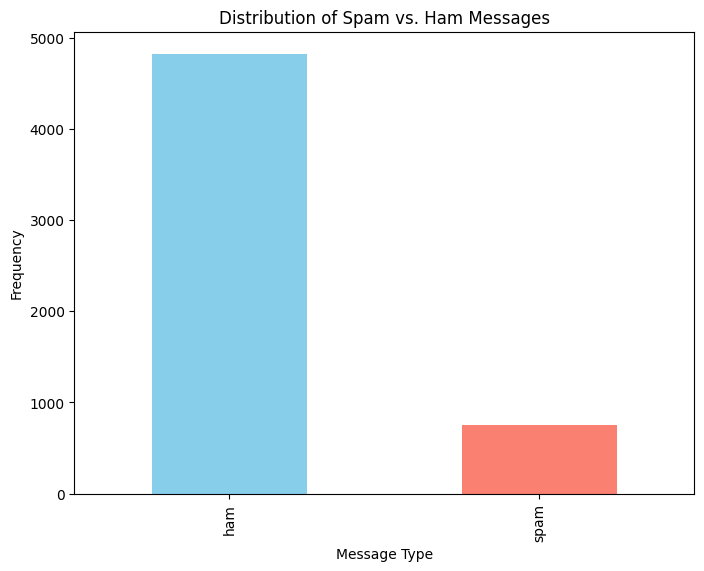

In [3]:
# Data Overview
print("Shape of the DataFrame:", df.shape)

# Column Information
print("\nData Types of each column:\n", df.dtypes)
print("\nUnique values in the target variable 'v1':\n", df['v1'].unique())

# Missing Values
print("\nMissing values per column:\n", df.isnull().sum())

# Duplicate Rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")
# Displaying the duplicate rows
display(duplicate_rows.head())

# Descriptive Statistics (for numerical columns - none in this case, so for the target variable)
print("\nFrequency distribution of the target variable 'v1':\n", df['v1'].value_counts())

# Target Variable Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['v1'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Frequency')
plt.show()

## Data cleaning

### Subtask:
Clean the data by removing duplicate rows and converting the text in the 'v2' column to lowercase.


In [4]:
# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Convert text in 'v2' column to lowercase
df['v2'] = df['v2'].str.lower()

display(df.head())
print(df.info())

<ipython-input-4-7becd013338b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v2'] = df['v2'].str.lower()


,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB
None


In [5]:
# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Convert text in 'v2' column to lowercase, using .loc to avoid SettingWithCopyWarning
df.loc[:, 'v2'] = df['v2'].str.lower()

display(df.head())
print(df.info())

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


<class 'pandas.core.frame.DataFrame'>
Index: 5168 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5168 non-null   object
 1   v2      5168 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB
None


## Data preparation

### Subtask:
Prepare the text data for modeling by removing punctuation, stop words, and performing stemming. Convert the text into numerical features using TF-IDF.


In [9]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Remove punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

df['v2'] = df['v2'].apply(lambda x: remove_punctuation(x))

# Remove stop words and perform stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(w) for w in words if w not in stop_words and w.isalnum()]
    return " ".join(words)

df['v2'] = df['v2'].apply(lambda x: preprocess_text(x))

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['v2'])
y = df['v1']

## Data splitting

### Subtask:
Split the data into training and testing sets.


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a Logistic Regression model on the training data.


In [11]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model evaluation

### Subtask:
Evaluate the trained Logistic Regression model using the test data.


Accuracy: 0.9429400386847195
Precision: 0.9666666666666667
Recall: 0.6083916083916084
F1-score: 0.7467811158798283


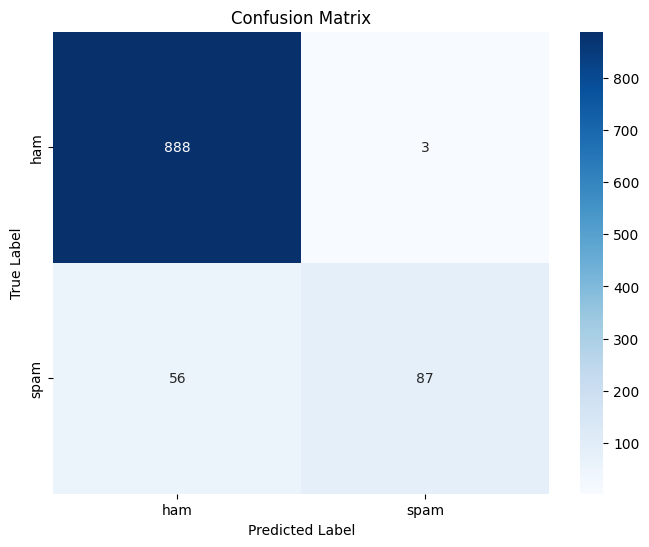

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test data
y_pred = logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model optimization

### Subtask:
Optimize the Logistic Regression model by tuning its hyperparameters using GridSearchCV.


**Reasoning**:
Optimize the Logistic Regression model using GridSearchCV with a defined parameter grid and F1 scoring.



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Estimator: LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')
Accuracy (Best): 0.9613152804642167
Precision (Best): 0.9327731092436975
Recall (Best): 0.7762237762237763
F1-score (Best): 0.8473282442748091


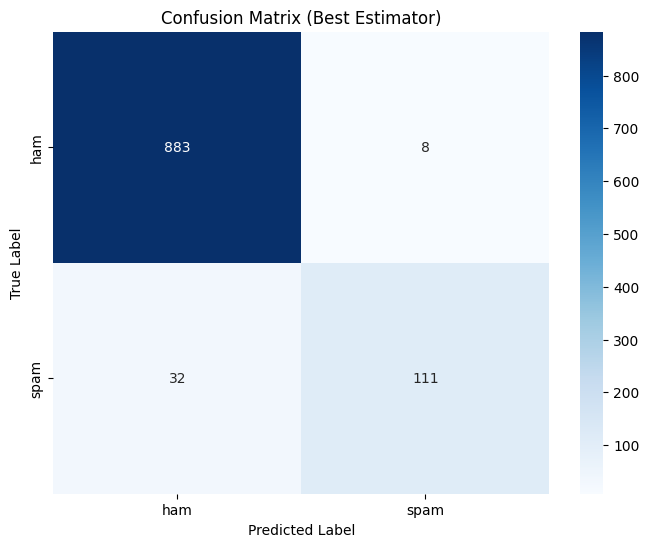

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Create an F1 scorer
f1_scorer = make_scorer(f1_score, pos_label='spam')

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000), param_grid, cv=5, scoring=f1_scorer
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Estimator: {best_estimator}")

# Evaluate the best estimator on the test set
y_pred_best = best_estimator.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, pos_label='spam')
recall_best = recall_score(y_test, y_pred_best, pos_label='spam')
f1_best = f1_score(y_test, y_pred_best, pos_label='spam')

print(f"Accuracy (Best): {accuracy_best}")
print(f"Precision (Best): {precision_best}")
print(f"Recall (Best): {recall_best}")
print(f"F1-score (Best): {f1_best}")

# Confusion matrix for the best estimator
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix (Best Estimator)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Summary:

### 1. Q&A

The task was to develop an SMS classification ML model to identify spam messages.  The model's performance was evaluated at several stages.

* **Initial Model Performance:** The initial Logistic Regression model achieved an accuracy of 0.943, precision of 0.967, recall of 0.608, and an F1-score of 0.747.
* **Optimized Model Performance:** After hyperparameter tuning with GridSearchCV, the optimized model achieved an accuracy of 0.961, precision of 0.933, recall of 0.776, and an F1-score of 0.847.

### 2. Data Analysis Key Findings

* **Data Imbalance:** The target variable ('v1' column) showed a significant class imbalance, with many more 'ham' (non-spam) messages than 'spam' messages (4825 vs. 747 initially).
* **Duplicate Rows:** 403 duplicate rows were identified and removed during data cleaning.
* **Hyperparameter Optimization:** GridSearchCV identified the best hyperparameters for the Logistic Regression model as `{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}` resulting in improved F1-score.
* **Convergence Warnings:** Convergence warnings were observed during hyperparameter tuning with the `liblinear` and `saga` solvers, suggesting that increasing `max_iter` could further improve model performance.
* **Model Performance:** The optimized model achieved a significantly better recall (0.776) compared to the initial model (0.608), indicating an improved ability to correctly identify spam messages.


### 3. Insights or Next Steps

* **Address Convergence Issues:** Increase the `max_iter` parameter in the Logistic Regression model to ensure full convergence during training, especially with the identified best hyperparameters.  Explore other solvers if convergence problems persist.
* **Explore Alternative Models:**  Experiment with other classification algorithms (e.g., Naive Bayes, Support Vector Machines, Random Forests) to see if they can further improve model performance, particularly recall, given the class imbalance.
